In [42]:
# import libraries
%matplotlib widget
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull 
from scipy import ndimage

# import our created function to read files
from Data_functions import getData

In [43]:
points, vectors = getData('../data/obj/Psyche Hanuš.obj') # read the file to get points and vectors with our read function

In [44]:
points, vectors # print to make sure everything looks right

(             x          y         z
 0     0.264157   5.740792  82.35036
 1    20.691957   5.740792  82.34746
 2     0.264157  26.494492  76.53256
 3   -20.228443   5.740792  80.02926
 4     0.264157 -14.626408  84.26186
 ..         ...        ...       ...
 397  20.154757   5.740792 -76.29494
 398   0.264157  27.546892 -83.11054
 399 -19.573043   5.740792 -75.66074
 400   0.264157 -13.268708 -71.05814
 401   0.264157   5.740792 -77.34204
 
 [402 rows x 3 columns],
          x      y      z
 0      1.0    2.0    3.0
 1      1.0    3.0    4.0
 2      1.0    4.0    5.0
 3      1.0    5.0    2.0
 4      2.0    6.0    7.0
 ..     ...    ...    ...
 795  398.0  390.0  397.0
 796  402.0  399.0  398.0
 797  402.0  400.0  399.0
 798  402.0  401.0  400.0
 799  402.0  398.0  401.0
 
 [800 rows x 3 columns])

In [45]:
faces = np.array([points['x'][vectors['x'][:]-1], points['y'][vectors['y'][:]-1], points['z'][vectors['z'][:]-1]]) # find faces through vector calculation
faces  # print to make sure everything looks right

array([[  0.264157,   0.264157,   0.264157, ...,   0.264157,   0.264157,
          0.264157],
       [  5.740792,  26.494492,   5.740792, ...,   5.740792, -13.268708,
          5.740792],
       [ 76.53256 ,  80.02926 ,  84.26186 , ..., -83.11054 , -75.66074 ,
        -71.05814 ]])

In [46]:
df = pd.DataFrame(faces) # put faces in a dataframe for plotting
df  # print to make sure everything looks right

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.264157,0.264157,0.264157,0.264157,20.691957,27.726857,0.264157,0.264157,-28.025143,-20.228443,...,-19.573043,0.264157,0.264157,0.264157,20.154757,20.154757,0.264157,0.264157,0.264157,0.264157
1,5.740792,26.494492,5.740792,-14.626408,5.740792,26.494492,32.151992,45.570692,5.740792,35.627692,...,-21.385208,-21.385208,-31.368808,-20.811908,-20.811908,5.740792,27.546892,5.740792,-13.268708,5.740792
2,76.532560,80.029260,84.261860,82.347460,73.518360,82.347460,70.181260,71.154460,76.532560,76.386360,...,-71.820140,-75.660740,-63.773140,-63.180540,-71.058140,-67.364240,-76.294940,-83.110540,-75.660740,-71.058140


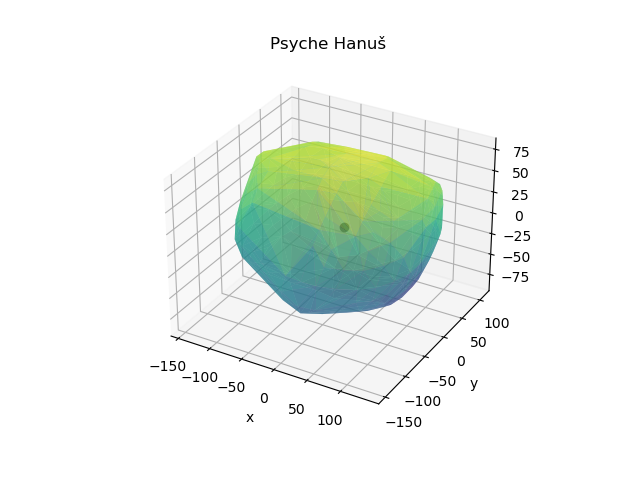

In [57]:
# relate coordinates to the dataframe coresponding components
x_coords = df.loc[0].values
y_coords = df.loc[1].values
z_coords = df.loc[2].values

points = np.column_stack((x_coords, y_coords, z_coords))
hull = ConvexHull(points)

# create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x_coords, y_coords, z_coords, triangles=hull.simplices, cmap='viridis', alpha=0.6)

# calculate center of mass from each coordinates and plot it
center = sum(x_coords)/len(x_coords), sum(y_coords)/len(y_coords), sum(z_coords)/len(z_coords)
plt.plot(center[0], center[1], marker='o', color='black')

# displaying the title and axes titles
plt.title("Psyche Hanuš")
plt.xlabel('x') 
plt.ylabel('y') 

plt.show()

[(1.92404536948165, 0.0),
 (1.7469488235788941, 1.0),
 (1.9305491567781021, 2.0),
 (2.207370017793135, 3.0),
 (1.528522429901203, 4.0),
 (1.399949325178636, 5.000000000000001),
 (1.6814704550677297, 5.999999999999999),
 (1.6059553954626744, 7.000000000000002),
 (2.9273945615421146, 8.0),
 (2.0526138471228097, 9.0),
 (2.544367142686606, 10.0),
 (3.8323436835326437, 10.999999999999998),
 (2.340583958806076, 12.0),
 (2.6573824504941865, 13.000000000000002),
 (1.463678174043493, 14.0),
 (1.7607342737880214, 15.000000000000002),
 (1.2501362785908638, 16.0),
 (1.1965343736534015, 16.999999999999996),
 (1.3092436485879022, 17.999999999999996),
 (1.310232140323537, 19.0),
 (1.5582010978422516, 20.000000000000004),
 (1.5134945439410057, 21.0),
 (2.267374293417566, 21.999999999999996),
 (1.9995884167320694, 22.999999999999996),
 (5.237247860338654, 24.0),
 (2.6175536930088996, 24.999999999999996),
 (3.880376148008076, 26.0),
 (18.003143706674294, 26.999999999999975),
 (5.478238859078909, 27.9999